<a href="https://colab.research.google.com/github/guiattard/PythonForGeosciences/blob/master/managing-interference-between-geothermal-installations/interference-geothermal-installations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Managing Interference Between Geothermal Installations

by [Guilllaume Attard](https://guillaumeattard.com/), [Hannes Hemmerle](https://applied.geo.uni-halle.de/people/hannes-hemmerle/) and [Peter Bayer](http://www.bayerpeter.com/)

http://pythonforgeosciences.com

(last update 17/09/2020)

![Interference between geothermal installations by Cerema 2020](https://guillaumeattard.com/wp-content/uploads/2020/08/managing-interference-between-geothermal-installations.png)

## Introduction

There is an increasing interest in utilizing shallow ground and groundwater as a source for geothermal heating and cooling. Either open- or closed-loop systems can be used for heat exchange with the subsurface to supply heat pumps of buildings. Open-loop systems (Fig. 1a) are either single or groups of wells which utilize groundwater directly as a heat carrier. Commonly, such groundwater heat pump (GWHP) systems are installations of doublet configurations with an extraction well for groundwater abstraction, and an injection well, where water is injected back into the same aquifer at the same rate, but at an altered temperature. Standard closed-loop systems (Fig. 1b) consist of vertical boreholes (BHEs) where plastic tubes are installed for circulating a heat carrier fluid.

Augmented geothermal utilization entails a higher density of installations and potential competition among adjacent systems. When neighbouring geothermal installations are regularly operated in a similar mode of seasonal heating and cooling, there is a risk that thermal interference mitigates the technological performance. Thus, for concerted management of dense installations, especially in cities, authorities and operators have to account for potential thermal interference. Proper management of these systems, however, is not only required in order to regulate the competition for the limited geothermal resource, but is also particularly relevant for sustainable thermal groundwater management that prevents heating or cooling of the subsurface towards environmentally critical levels.

The aim of this article is to present a methodology to define the appropriate distance that should be kept between existing and future installations of different power to protect existing installations and optimally manage the urban thermal use of shallow groundwater. The following section introduces how thermal capture probability can be used as a criterion to define protection perimeters around geothermal installations. Subsequently, analytical models are adapted to calculate thermal capture probabilities, as well as the maximal acceptable power that can be exploited by open or closed loop geothermal installations.

An example focusing on the long term thermal impact and probability of capture around a multiple BHE installation is given at the end of this article.

![Open and closed geothermal systems (from Bayer et al. 2019 (RSER))](https://guillaumeattard.com/wp-content/uploads/2020/08/open-closed-geothermal-systems.png)

*Figure 1: a) Open and b) closed geothermal systems (from [Bayer et al. 2019](https://doi.org/10.1016/j.rser.2019.02.019))*

In the following, some libraries are needed:

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.special import erf,erfc,erfcinv
import scipy.integrate as integrate   

%matplotlib inline

In the following some physical parameters are considered constant in the all notebook (you can of couse change them if you want to see the influence on the results):

In [ ]:
C_m = float(2.888*1e6) #volumetric heat capacity porous media (J /kg /K)
C_w = float(4.185*1e6) #volumetric heat capacity water (J /kg /K)
alpha_L = float(5) #longitudinal dispersivity (m)
alpha_T = float(0.5) #transverse dispersivity (m)
lambda_m = float(2.24) #thermal conductivity (W /m /K)

## Definition of a thermal protection perimeter

The problem we are studying is to define a thermal protection perimeter around a geothermal installation to avoid an unreasonable temperature alteration $\Delta T_{max}$, which would be caused by an external heat injection $I$ (Fig. 2). The following definitions are given:
- The protection target area (PTA) of a geothermal installation is defined as the small core area that includes all heat production devices of the installation.
- The thermal protection perimeter (TPP) of an installation is defined as the surrounding area, where an external heat injection $I$ generates a temperature alteration above $\Delta T_{max}$ in the protection target area of the installation.

The interaction between the external heat injection and the PTA can be described by a transfer function, which is defined as the outlet response of the advective-dispersive system to a heat Dirac input at the location of the external heat injection. This transfer function represents a probability density function of travel time distribution between the external heat injection location and the PTA.

![transfer-function-heat-geothermal-systems](https://guillaumeattard.com/wp-content/uploads/2020/08/transfer-function-heat-geothermal-systems.jpg)

*Figure 2: Illustration of protection target areas (PTA) of open-loop (a) and closed-loop (b) geothermal systems operating within a 2D model aquifer with a regional groundwater flow from the West to the East (from [Attard et al., 2020](https://doi.org/10.1016/j.renene.2019.06.095))*

By expressing (1) the probability $p(t)$ that a heat quantity introduced somewhere into the aquifer is captured at the PTA and (2) the heat flowing through the PTA, it is possible to determine a protection criterion linking :
- the probability of capture $p(t)$,
- the maximal acceptable temperature variation $\Delta T_{max}$ in the protection target area of the installation,
- $Q$, the water flowing through the PTA: the pumping rate for an open-syestem, the Darcy rate for a closed-system,
- the external heat power injected $I$

In fact, under the assumption of (1) a constant undisturbed background temperature, (2) steady-state hydraulic conditions *(This also means that any external heat injection by a neighbouring system is assumed to have a negligible temporal influence on the flow regime)* and (3) a constant external heat input, the protection criterion is given by:

$p(t) < \frac{\Delta T_{max} \times Q \times C_{w}}{I}$

where $C_{W}$ is the volumetric heat capacity of water. **This criterion implies that if the external heat power injection $I$ is located in an area where the heat probability of capture is low enough, the warming of water inside the PTA will be lower than $\Delta T_{max}$.**

## Quantifying thermal capture probabilities

Thermal capture probability refers to a given geothermal installation and is defined as the probability that the heat from any spatial point is transported to this installation. The mathematical technique to compute a probability field for a thermal quantity to reach a domain of interest assumes injection of a thermal pulse in the domain of interest, and it solves the heat transport equation considering a reverse flow. The probability field can then be calculated by integration of the heat signal moving in the backward direction (Fig 3). Because the thermal response of a pulse is the derivative function of the thermal response of a constant heat load, this problem can be equivalently solved by studying groundwater temperature disturbances in the backward direction caused by a constant thermal anomaly of, for instance, $\Delta T = 1 K$ assigned at the location of the geothermal device. Consequently, any analytical and numerical models available for simulation of the thermal impact caused by a heat injection in groundwater in the forward direction of flow can be used to determine capture probabilities in the backward direction.

![backward-forward-groundwater-flow](https://guillaumeattard.com/wp-content/uploads/2020/08/backward-forward-groundwater-flow.jpg)

*Figure 3: Description of the problem in the forward (a) and backward (b) directions*

### Open-systems

To evaluate the zone of thermal influence by an open-loop system, semi-analytical solutions can be used (see previous article [here](https://guillaumeattard.com/article-1/)). For instance, the planar advective heat transport model described by [Hähnlein et al., (2010)](https://link.springer.com/article/10.1007/s00767-009-0125-x) can be used.

The planar advective heat transport model accounts for the fact that injection may induce a high local hydraulic gradient around the injection well. In such a case, the geometry of this heat source cannot be considered only with a vertical line. Instead, the source is represented as an area in the yz-plane. Accordingly, in a 2D horizontal projection in the xy-plane, the heat source corresponds to a line perpendicular to the groundwater flow direction. Please note that this model is undefined upstream the injection (for x < 0). It is finally given by:

$\Delta T(x,y,t) = \frac{\Delta T_{0}}{4} \text{erfc}\left( \frac{Rx - v_{a}t}{2 \sqrt{D_{x}Rt}}\right) \left( \text{erf}\left( \frac{y + Y/2}{2 \sqrt{D_{y}x/v_{a}}}\right) - \text{erf}\left( \frac{y - Y/2}{2 \sqrt{D_{y}x/v_{a}}}\right)\right)$

with $\Delta T_{0} = \frac{F_{0}}{v_{a}nC_{w}Y}$, $F_{0} = \frac{q_{h}}{b}$, $q_{h} = \Delta T_{inj} C_{w} Q_{inj}$, $D_{x,y} = \frac{\lambda _{m}}{n C_{w}} + \alpha _{L,T} v_{a}$  and $Y = \frac{Q_{inj}}{2b v_{a} n}$

To calculate probability fields upstream of production wells of open-loop systems, this model is rearranged considering $\Delta T_{inj} = 1 K$ and a reverse flow is assumed meaning that $x$ becomes $-x$. After some simplifications, it gives: 

$p(x,y,t) = \frac{1}{4} \text{erfc}\left( \frac{-Rx - v_{a}t}{2 \sqrt{D_{x}Rt}}\right) \left( \text{erf}\left( \frac{y + Y/2}{2 \sqrt{-D_{y}x/v_{a}}}\right) - \text{erf}\left( \frac{y - Y/2}{2 \sqrt{-D_{y}x/v_{a}}}\right)\right)$

Introducing:
- $\alpha $: the angle (degree) between the west-east diection and the direction of groundwater flow,
- $X_{0}$ and $Y_{0}$: the location of the injection well of the doublet,
- $X_{1}$ and $Y_{1}$: the location of the extraction well of the doublet 

Both models are defined as follows:

In [ ]:
def PAHT(x, y, X0, Y0, alpha, t, Qinj, DTinj, 
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    """
    This model returns the temperature difference downstream of an injection of water
    at altered temperature
    """
    Y = Qinj/(2*b*va*n)
    qh = DTinj*C_w*Qinj
    F0 = qh/b
    DT0 = F0/(va*n*C_w*Y)
    Dx = lambda_m/n/C_w + alpha_L*va
    Dy = lambda_m/n/C_w + alpha_T*va
    R = C_m/(n*C_w)
     
    alpha_rad = -alpha*np.pi/180
    x1 = x - X0                                                          
    y1 = y - Y0 
     
    x2 = np.cos(alpha_rad)*x1 - np.sin(alpha_rad)*y1                  
    y2 = np.sin(alpha_rad)*x1 + np.cos(alpha_rad)*y1
    
    #To avoid an error due to sqrt with negative values
    x2 = np.where(x2 > 0, x2, np.inf)
     
    res = DT0/4*erfc((R*x2 - va*t)/(2*np.sqrt(Dx*R*t)))*\
    (erf((y2 + Y/2)/(2*np.sqrt(Dy*x2/va))) - erf((y2 - Y/2)/(2*np.sqrt(Dy*x2/va))))
       
    #We correct the values when the temperature is higher to the injected temperature
    res = np.where(res < DTinj, res, DTinj)
 
    return res

def p_open(x, y, X1, Y1, alpha, t, Qinj, 
           b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    """
    This model returns the probability of capture of heat injected upstream of an extraction well
    of an open-system
    """
    proba = PAHT(x, y, X1, Y1, alpha + 180, t, Qinj, 1, 
                 b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)
    
    # We correct the values when probability is higher than 1
    proba = np.where(proba < 1, proba, 1)
    
    return proba

With these models defined, we can visualise the thermal impact and the probability of capture around an installation. We first need to define a region of interest and create an associated grid:



In [ ]:
#definition of a grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -50
Xmax = 70
xgrid_len = 200

Ymin = -40
Ymax = 70
ygrid_len = 200

#We create a grid
xi = np.linspace(Xmin, Xmax, xgrid_len)
yi = np.linspace(Ymin, Ymax, ygrid_len)
xi, yi = np.meshgrid(xi, yi)

Then, we define some hydrogeological parameters as example, and the technical caracteristics of the open-loop system we want to test:

In [ ]:
alpha = float(20) # groundwater flow angle
K = float(0.0015) #permeability (m/s)
b = float(10) #aquifer thickness [m]
grad_h = float(0.0015) #hydraulic gradient
n = float(0.2) #effective porosity
 
v0 = K*grad_h #darcy velocity
va = v0/n #seepage velocity
R = C_m/(n*C_w) #retardation factor
 
#We define the location of the hot water injection
X0, Y0 = 20, 20
DTinj = 10. #temperature difference between pumping and reinjection
Qinj = 0.0002 #injection and pumping rate m3/s
time = 120*24*3600 # operation time in seconds (365 days)

#We define the location of the extraction well
X1, Y1 = 0, 0

We finnaly calculate the thermal impact and the probability of capture after one year of operation and we plot the result:

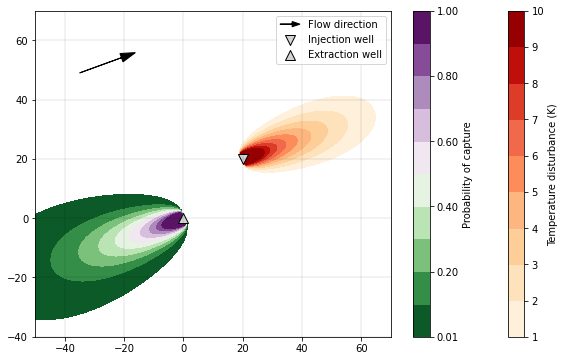

In [ ]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches


# First we calculate the thermal impact using the PAHT model
thermalImpact = PAHT(xi, yi, X0, Y0, alpha, time, Qinj, DTinj, 
                      b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)

# Secondly we calculate the probability of capture using the adapted model
probabilityCapture = p_open(xi, yi, X1, Y1, alpha, time, Qinj, 
                             b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)

# Then we create the chart
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect('equal')

# Thermal plume caused by the open-loop doublet
cf1= ax.contourf(xi, yi, thermalImpact, 
                 [1,2,3,4,5,6,7,8,9,10], 
                 cmap='OrRd')

fig.colorbar(cf1, label = "Temperature disturbance (K)")

# Probability of capture around the open-loop doublet
cf2= ax.contourf(xi, yi, probabilityCapture, 
                 [0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
                 cmap='PRGn_r')
fig.colorbar(cf2, label = "Probability of capture")

ax.grid(color='black', linestyle='-', linewidth=0.1)

T = ax.scatter(X0, Y0, marker='v', s=100, color='lightgray', edgecolors='k') 
P = ax.scatter(X1, Y1, marker='^', s=100, color='lightgray', edgecolors='k') 

ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)
# We add an arrow to indicate the groundwater flow direction:
arr = ax.arrow(Xmin*0.7, Ymax*0.7, 
               15*np.cos(alpha*np.pi/180),
               15*np.sin(alpha*np.pi/180), 
               head_width=3, 
               head_length=5, fc='k', ec='k')

# To add the flow direction in the Legend:
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

plt.legend([arr, T, P], ['Flow direction', "Injection well", "Extraction well"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})
 
plt.show()

Reformulating protection criterion equation, we can determine the maximal acceptable power by:
    
$P_{max} < \frac{\Delta T_{max} \times Q \times C_{w}}{p(t)}$

Then, considering $\Delta T_{max} = 2 K$:

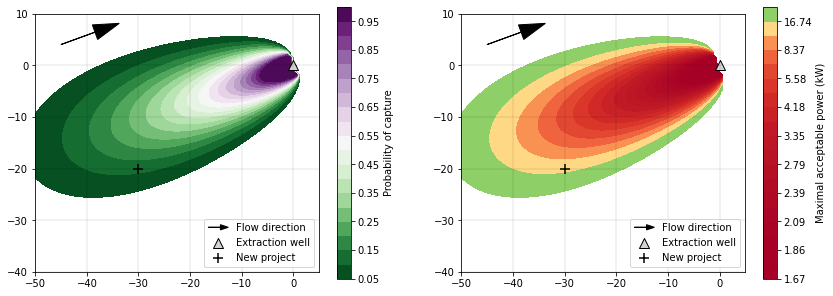

In [ ]:
DTmax = 2 

def maxPowerOpenSystem(x, y, X1, Y1, alpha, t, Qinj, DTmax,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    
    proba = p_open(x, y, X1, Y1, alpha, t, Qinj, 
                             b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)
    
    #to avoid areas were the probability is 0 and an error, we consider a very low value instead:
    epsilon = 0.00000001
    proba = np.where(proba > 0, proba, epsilon)
    
    return DTmax*Qinj*C_w/(proba)

maxPower_example = maxPowerOpenSystem(xi, yi, X1, Y1, alpha, time, Qinj, DTmax,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)/1000 #unit kW

proba_range = [round(k/20 + 0.05,2) for k in range(20)]
power_range = [DTmax*Qinj*C_w/(p*1000) for p in proba_range[::-1]] #unit kW

Xmax = 5
Ymax = 10

fig, axs = plt.subplots(1, 2,figsize=(14,5))
ax = axs[0]
ax.set_aspect('equal')

# Probability of capture around the open-loop doublet
cf1= ax.contourf(xi, yi, probabilityCapture, 
                 proba_range, 
                 cmap='PRGn_r')

cb = fig.colorbar(cf1, ax = ax)
cb.ax.set_ylabel('Probability of capture')

ax.grid(color='black', linestyle='-', linewidth=0.1)

abs_well = ax.scatter(X1, Y1, marker='^', s=100, color='lightgray', edgecolors='k')
new_project = ax.scatter(-30, -20, marker = '+', s=100, color='black')   
ax.set_xlim(Xmin, 5)
ax.set_ylim(Ymin, 10)

arr = ax.arrow(Xmin*0.9, Ymax*0.4, 
               7*np.cos(alpha*np.pi/180),
               7*np.sin(alpha*np.pi/180), 
               head_width=3, 
               head_length=5, fc='k', ec='k')

ax.legend([arr, abs_well, new_project], 
           ['Flow direction', 'Extraction well', 'New project'], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)},
          loc='lower right')

ax = axs[1]
ax.set_aspect('equal')

# Maximal acceptable power around the open-loop doublet
cf2= ax.contourf(xi, yi, maxPower_example, 
                 power_range,
                 cmap='RdYlGn')

cb = fig.colorbar(cf2, ax = ax)
cb.ax.set_ylabel('Maximal acceptable power (kW)')

ax.grid(color='black', linestyle='-', linewidth=0.1)

abs_well = ax.scatter(X1, Y1, marker='^', s=100, color='lightgray', edgecolors='k')
new_project = ax.scatter(-30, -20, marker = '+', s=100, color='black')     
ax.set_xlim(Xmin, 5)
ax.set_ylim(Ymin, 10)

arr = ax.arrow(Xmin*0.9, Ymax*0.4, 
               7*np.cos(alpha*np.pi/180),
               7*np.sin(alpha*np.pi/180), 
               head_width=3, 
               head_length=5, fc='k', ec='k')

ax.legend([arr, abs_well, new_project], 
           ['Flow direction', "Extraction well", "New project"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)},
           loc='lower right')

plt.show()

Here is an example of how to read these figures. Let's consider a future geothermal installation project located in ($X = -30$ and $Y = -20$). These figures can be read as follow: 12% of the heat input coming from a new project located at the black cross, reach the abstraction well before 120 days (the simulation time considered in the current example). It also means that if an heat power of 14 kW is applied at the new project location, the extracted water at the abstraction well location will be reheated by 2 K (the threshold we considered in the current example) within 120 days.

We can also directly calculate these values using previous functions:

In [ ]:
# We define the location of the new project:
X_test, Y_test = -30, -20

print("Probability of capture at the location of the new project:",
      round(float(p_open(X_test, Y_test, X1, Y1, alpha, time, Qinj, 
                         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)),2),)

print("Max. acceptable power at the location of the new project: ",
      round(float(maxPowerOpenSystem(X_test, Y_test, X1, Y1, alpha, time, Qinj, DTmax,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)/1000)), "kW")

Probability of capture at the location of the new project: 0.12
Max. acceptable power at the location of the new project:  14 kW


### Closed-systems

Several analytical solutions are available to calculate the thermal response of an aquifer to operation of closed-loop geothermal systems. Here, the analytical model used to calculate capture probability around such systems is based on the moving infinite line source theory initially  proposed by [Carslaw and Jaeger](https://link.springer.com/chapter/10.1007/978-3-319-48090-9_9). This semi-analytical model allows for the calculation the thermal response of a line source of infinite length along the vertical direction with a continuous heat flow rate q_tb per unit length of the BHE in a uniform advective-dispersive flow system. According to [Stauffer et al.](https://www.taylorfrancis.com/books/9780429098086), the moving infinite line source model considering dispersion (MILD) reads:

$\Delta T(x,y,t) = \frac{q_{th}}{4 \pi C_{m} \sqrt{ D_{t,L} D_{t,T}}} \text{exp}⁡[\frac{u_{t} x}{2D_{t,L}}] \int_{\frac{x^{2}}{4D_{t,L} t} + \frac{y^{2}}{4D_{t,T} t}}^{\infty} \text{exp}\left(- \Psi -(\frac{x^{2}}{D_{t,L}} + \frac{y^{2}}{D_{t,T}}) \frac{u_{t}^{2}}{16 D_{t,L} \Psi}\right) \frac{\mathrm{d}\Psi}{\Psi}$

with $u_{t} = \frac{C_{w}n}{C_{m}}v_{a}$ and $D_{t,L/T} = \frac{\lambda _{m}}{C_{w}} + \alpha _{L/T} u_{t}$

To calculate probability fields upstream of heat extracting closed-loop systems, the MILD is rearranged. For this, again reverse flow is described by replacing $x$ with $-x$. In addition to that, $q_{th}$ is expressed as the power per unit length needed to reheat by $1 K$ the virtual Darcy flow rate (per unit length) crossing the BHE location:
$q_{th} = KidC_{w}$

where K is the hydraulic conductivity, i is the hydraulic gradient, and d represents the borehole diameter. This yields the probability field around a borehole located at the origin ($x=0$, $y=0$):

$p_{BHE} (x,y,t) = \frac{KidC_{w}}{4 \pi C_{m} \sqrt{ D_{t,L} D_{t,T}}} \text{exp}⁡[\frac{- u_{t} x}{2D_{t,L}}] \int_{\frac{x^{2}}{4D_{t,L} t} + \frac{y^{2}}{4D_{t,T} t}}^{\infty} \text{exp}\left(- \Psi -(\frac{x^{2}}{D_{t,L}} + \frac{y^{2}}{D_{t,T}}) \frac{u_{t}^{2}}{16 D_{t,L} \Psi}\right) \frac{\mathrm{d}\Psi}{\Psi}$

Introducing:
- $\alpha $: the angle (degree) between the west-east diection and the direction of groundwater flow,
- $X_{0}$ and $Y_{0}$: the location of the BHE,

the MILD model is defined as follow:

In [ ]:
def MILSd(x, y, t, X0, Y0, P, va, n, b, C_m, C_w, alpha, alpha_L, alpha_T, lambda_m):
    """
    This models gives the temperature disturbance in (x,y) caused by a closed borehole heat exanger located
    in X0, Y0 with a power P"""
    QL=P/b #power by length of the borehole
    Dt = lambda_m/C_m
    vt = va*n*C_w/C_m
    Dx = Dt + alpha_L*vt 
    Dy = Dt + alpha_T*vt
    
    alpha_rad = -alpha*np.pi/180
    x1 = x - X0                                                          
    y1 = y - Y0 
     
    x2 = np.cos(alpha_rad)*x1 - np.sin(alpha_rad)*y1                  
    y2 = np.sin(alpha_rad)*x1 + np.cos(alpha_rad)*y1

    e_x = 0.001 #to avoid error calculation at the origin
    if x2 == 0 and y2 == 0:
      x2 = e_x
    
    b_inf = (((x2**2)/4/Dx/t)+((y2**2)/4/Dy/t))
   
    return QL*(1./4./np.pi/C_m/np.sqrt(Dx*Dy))*np.exp(vt*x2/2/Dx)*integrate.quad(
        lambda psi: 1/psi*np.exp(-psi-((x2**2/Dx)+(y2**2/Dy))*(vt**2)/16/Dx/psi),b_inf,np.Inf)[0]

# to use the Model over a grid:
def MILSd_grid(xi, yi, t, X0, Y0, P, va, n, b, C_m, C_w, alpha, alpha_L, alpha_T, lambda_m):
    """
    This function gives the temperature disturbance caused by a closed borehole heat exanger located
    in X0, Y0 with a power P over a grid xi, yi
    """
    DELTA_T = xi - xi #the result grid full of 0
    
    for i in range(len(xi)):
        for j in range(len(yi)):
            DELTA_T[i,j] = MILSd(xi[i,j], yi[i,j], t, X0, Y0, P, va, n, b, 
                                 C_m, C_w, alpha, alpha_L, alpha_T, lambda_m)
    return DELTA_T

# We adapt the model to calculate probabilities:
def proba_closed(xi, yi, t, X0, Y0, d, va, n, b, C_m, C_w, alpha, alpha_L, alpha_T, lambda_m):
    """
    This function gives the probability to reach a BHE located in X0, Y0 over a grid
    """
    Qd = va*n*b*d
    P_unit = Qd*C_w*1.
    
    return MILSd_grid(xi, yi, t, X0, Y0, P_unit, va, n, b, C_m, C_w, 
                      alpha+180, alpha_L, alpha_T, lambda_m)

Now we choose some hydrogeological parameters to calculate the thermal impact and the probability of capture around a BHE. In addition, we consider that the BHE is located at the origin and has a power of 50 kW and a diamter of 1 m:

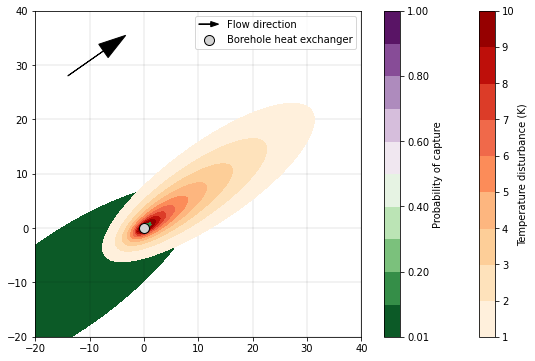

In [ ]:
# We define the simulation time
time = 120*24*3600

# We define some parameters associated to the BHE 
X0, Y0 = 0, 0
d = 1.                #Diameter of BHE in m
Pi = 50000            #power in W

# We define some hydrogeological parameters:
alpha = float(35)     #groundwater flow angle
K = float(0.001)      #permeability (m/s)
b = float(100)        #aquifer thickness [m]
grad_h = float(0.002) #hydraulic gradient
n = float(0.1)        #effective porosity
 
v0 = K*grad_h         #darcy velocity
va = v0/n             #seepage velocity
R = C_m/(n*C_w)       #retardation factor

#definition of our grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -20
Xmax = 40
xgrid_len = 100

Ymin = -20
Ymax = 40
ygrid_len = 100

#We create your grid of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

#We calculate the thermal impact
closedDeltaT = MILSd_grid(xi,yi, time, X0, Y0, Pi,va, n, b, C_m, C_w, 
                     alpha, alpha_L, alpha_T, lambda_m)

# We calculate the probability of capture over the grid:
closedProba = proba_closed(xi, yi, time, X0, Y0, d, va, n, b, C_m, C_w, alpha, alpha_L, alpha_T, lambda_m)

# We plot the result:
fig, ax = plt.subplots(figsize=(10,6))

# Thermal plume caused by the closed-loop system
cf1 = ax.contourf(xi, yi, closedDeltaT, 
                 [1,2,3,4,5,6,7,8,9,10], 
                 cmap='OrRd', zorder = 2)
fig.colorbar(cf1, label = "Temperature disturbance (K)")

# Probability of capture around the closed-loop dsystem
cf2 = ax.contourf(xi, yi, closedProba, 
                 [0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
                 cmap='PRGn_r', zorder = 1)
fig.colorbar(cf2, label = "Probability of capture")

BHE = ax.scatter(X0, Y0, marker='o', s=100, color='lightgray', edgecolors='k',  zorder=2)

ax.set_aspect('equal')
ax.grid(color='black', linestyle='-', linewidth=0.1)
ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)
# We add an arrow to indicate the groundwater flow direction:
arr = ax.arrow(Xmin*0.7, Ymax*0.7, 
               8*np.cos(alpha*np.pi/180),
               8*np.sin(alpha*np.pi/180), 
               head_width=3, 
               head_length=5, fc='k', ec='k')

# To add the flow direction in the Legend:
plt.legend([arr, BHE], ['Flow direction', "Borehole heat exchanger"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

plt.show()

Finally, the maximal acceptable heat power around the BHE is calulate as follows considering $\Delta T_{max} = 2 K$:

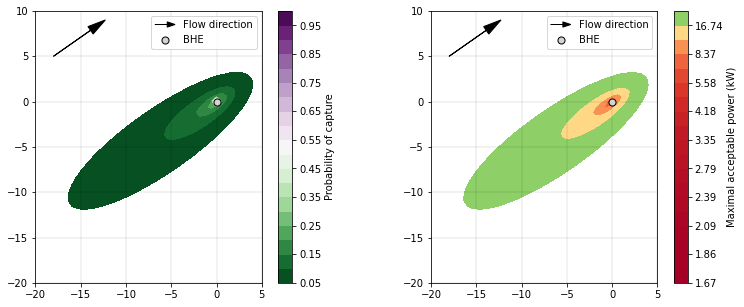

In [ ]:
epsilon = 1e-9  #This is a residual value for areas where is probability of capture is close to 0
closedProba = np.where(closedProba > 0,closedProba, epsilon)

Qd = va*n*d*b   #The Darcy flow around BHE with a diameter "d"
DTmax = 2       #The acceptable temperature variation at the BHE location

# Then we calculate the maximal acceptable power around the BHE
maxPowerClosedExample = DTmax*Qd*C_w/closedProba

proba_range_closed = [round(k/20 + 0.05,2) for k in range(20)]
power_range_closed = [DTmax*Qd*C_w/(p*1000) for p in proba_range_closed[::-1]] #unit kW

Xmax = 5
Ymax = 10
fig, axs = plt.subplots(1, 2,figsize=(13,5))
ax = axs[0]
ax.set_aspect('equal')
ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)

# Probability of capture around the BHE
cf1= ax.contourf(xi, yi, closedProba, 
                 proba_range_closed, 
                 cmap='PRGn_r')

cb = fig.colorbar(cf1, ax = ax)
cb.ax.set_ylabel('Probability of capture')

ax.grid(color='black', linestyle='-', linewidth=0.1)

# Location of the BHE
BHE = ax.scatter(X0, Y0, marker='o', s=50, color='lightgray', edgecolors='k',  zorder=2)

# Direction of the groundwater flow
arr = ax.arrow(Xmin*0.9, Ymax*0.5, 
               5*np.cos(alpha*np.pi/180),
               5*np.sin(alpha*np.pi/180), 
               head_width=1, 
               head_length=2, fc='k', ec='k')

ax.legend([arr, BHE], 
           ['Flow direction', "BHE"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

ax = axs[1]
ax.set_aspect('equal')
ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)

# Probability of capture around the closed-loop system
cf2= ax.contourf(xi, yi, maxPowerClosedExample/1000, 
                 power_range_closed,
                 cmap='RdYlGn')

cb = fig.colorbar(cf2, ax = ax)
cb.ax.set_ylabel('Maximal acceptable power (kW)')

ax.grid(color='black', linestyle='-', linewidth=0.1)

# Location of the BHE
BHE = ax.scatter(X0, Y0, marker='o', s=50, color='lightgray', edgecolors='k',  zorder=2)

# Direction of the groundwater flow
arr = ax.arrow(Xmin*0.9, Ymax*0.5, 
               5*np.cos(alpha*np.pi/180),
               5*np.sin(alpha*np.pi/180), 
               head_width=1, 
               head_length=2, fc='k', ec='k')

ax.legend([arr, BHE], 
           ['Flow direction', "BHE"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

plt.show()

### Long term thermal impact and probability of capture around a multiple BHE installation

In this last section, we illustrate how to apply this methodology to a multiple BHE installations. We use previous models to determine long term (30 years) thermal impact and probability of capture around the installation.

After defining simulation time and aquifer properties, the installation properties are defined (location of BHEs, power and diameters). Then, we make a loop over BHEs to calculate the cumulative thermal impact and the total probability of capture:

In [ ]:
###########################################################################
#                             Simulation time                            ##
###########################################################################
long_term_period = 30*365*24*3600 #30 years in seconds

###########################################################################
#                             AQUIFER properties                         ##
###########################################################################
b = 100.            #aquifer thickness (m)
n = 0.30            #aquifer porosity (-)
va = 0.05/24./3600. #seepage velocity (m/s)
alpha = 0           #angle between flow direction and x-axis

###########################################################################
#                         CLOSED-SYSTEM properties                       ##
###########################################################################
P0 = 5000 #individual boreholes power in W
d = 1.    #BHE diameter

BHES = [(0, 0, P0, d),
        (0, 15, P0, d),
        (0, -15, P0, d),
        (0, 30, P0, d),
        (0, -30, P0, d)] # BHEs locations and Power (X, Y, Power, BHE diameter)   

###########################################################################
#                 Windows properties and Grid of interest                ##   
###########################################################################
Xmax = 300
Xmin= -Xmax
Ymax = (Xmax-Xmin)/2         
Ymin = -Ymax

#We create our grid of interest
xgrid_len = 100
ygrid_len = 100
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

###########################################################################
#             Thermal impact and probability of capture                  ##   
###########################################################################
multipleClosedDeltaT = xi - xi  # we initialize the grid to zeros
multipleClosedProba = xi - xi   # we initialize the grid to zeros

for bhe in BHES:
    x_bhe = bhe[0]
    y_bhe = bhe[1]
    P_bhe = bhe[2]
    d_bhe = bhe[3]
        
    multipleClosedDeltaT += MILSd_grid(xi,yi, long_term_period, 
                                       x_bhe, y_bhe, P_bhe, va, 
                                       n, b, C_m, C_w, alpha, 
                                       alpha_L, alpha_T, lambda_m)
    
    multipleClosedProba += proba_closed(xi, yi, long_term_period, 
                                        x_bhe, y_bhe, d_bhe, va, 
                                        n, b, C_m, C_w, alpha, 
                                        alpha_L, alpha_T, lambda_m)
    
multipleClosedProba = np.where(multipleClosedProba < 1,multipleClosedProba, 1)

After the calculation is made, we can plot the results:

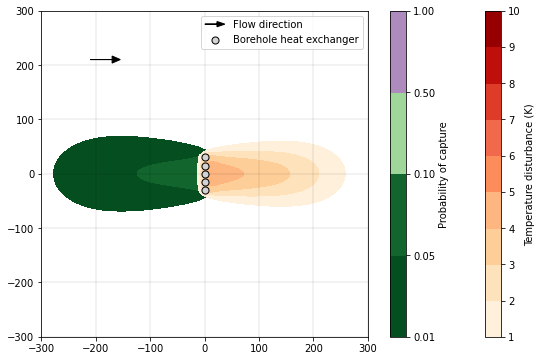

In [ ]:
# We plot the results:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect('equal')

# Thermal plume caused by the closed-loop system
cf1= ax.contourf(xi, yi, multipleClosedDeltaT, 
                 [1,2,3,4,5,6,7,8,9,10], 
                 cmap='OrRd', zorder = 1)

fig.colorbar(cf1, label = "Temperature disturbance (K)")

# Probability of capture around multiple closed-loop systems
cf2= ax.contourf(xi, yi, multipleClosedProba, 
                 [1e-2,5e-2,1e-1,5e-1,1], 
                 cmap='PRGn_r', zorder = 0)
fig.colorbar(cf2, label = "Probability of capture")

ax.grid(color='black', linestyle='-', linewidth=0.1)

BHE = ax.scatter([bhe[0] for bhe in BHES], [bhe[1] for bhe in BHES], marker='o', s=50, color='lightgray', edgecolors='k',  zorder=2)



# We add an arrow to indicate the groundwater flow direction:
arr = ax.arrow(Xmin*0.7, Ymax*0.7, 
               40*np.cos(alpha*np.pi/180),
               20*np.sin(alpha*np.pi/180), 
               head_width=13, 
               head_length=15, fc='k', ec='k')

# To add the flow direction in the Legend:
plt.legend([arr, BHE], ['Flow direction', "Borehole heat exchanger"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

plt.show()

Then, we can calculate the maximal acceptable power that can be exploited around the installation considering the probability of individual BHEs. Here we consider that the temperature alteration at each BHE should not exceed $\Delta T_{max}$. Then, we have to make a loop over BHEs and store individual probabilities of capture fields:

In [ ]:
# We initialize some matrix to zeros
multipleClosedProba = xi - xi #The probability of capture around the installation
MaxPowerMultplieClosed = xi -xi #The maximal acceptable power around the installation
MaxPowerMultplieClosed += 10000000000 # We consider a very large value for initializing the calculation

# We consider a maximum temperature difference caused by a new installation to 2K:
DTmax = 2.

# We make a loop on BHES
for bhe in BHES:
    x_bhe = bhe[0]
    y_bhe = bhe[1]
    P_bhe = bhe[2]
    d_bhe = bhe[3]
    
    # we calculate the Darcy flow around the bhe
    Qd_bhe = d_bhe*va*n*b
    
    # we calculate the probability of capture around the BHE
    bhe_Proba = proba_closed(xi, yi, long_term_period, 
                                x_bhe, y_bhe, d_bhe, va, 
                                n, b, C_m, C_w, alpha, 
                                alpha_L, alpha_T, lambda_m)
    
    # The cumulative result (probability of capture) is calculated here:
    multipleClosedProba += bhe_Proba
    
    # we calculate the maximal acceptable power around earch BHE
    MaxPowerBHE = DTmax*Qd*C_w/bhe_Proba
    
    # The global maximal acceptable power is ajusted depending on the current value and the BHE result:
    MaxPowerMultplieClosed = np.where(
        MaxPowerMultplieClosed >= MaxPowerBHE, 
        MaxPowerBHE,MaxPowerMultplieClosed)

The final result is given below:

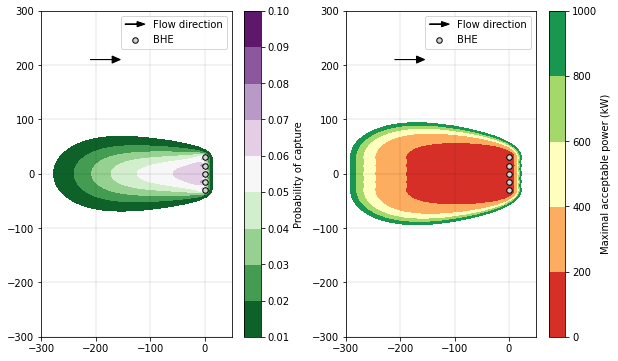

In [ ]:
Xmax = 50 #to adjust the scale

fig, axs = plt.subplots(1, 2,figsize=(10,6))
ax = axs[0]
ax.set_aspect('equal')
ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)

# Probability of capture
cf1= ax.contourf(xi, yi, multipleClosedProba, 
                 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], 
                 cmap='PRGn_r')

cb = fig.colorbar(cf1, ax = ax)
cb.ax.set_ylabel('Probability of capture')

ax.grid(color='black', linestyle='-', linewidth=0.1)

# Location of BHEs
BHE = ax.scatter([bhe[0] for bhe in BHES], [bhe[1] for bhe in BHES], 
                 marker='o', s=30, color='lightgray', edgecolors='k',  zorder=2)

# We add an arrow to indicate the groundwater flow direction:
arr = ax.arrow(Xmin*0.7, Ymax*0.7, 
               40*np.cos(alpha*np.pi/180),
               20*np.sin(alpha*np.pi/180), 
               head_width=13, 
               head_length=15, fc='k', ec='k')

ax.legend([arr, BHE], 
           ['Flow direction', "BHE"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

ax = axs[1]
ax.set_aspect('equal')
ax.set_xlim(Xmin, Xmax)
ax.set_ylim(Ymin, Ymax)

# Probability of capture around multiple closed-loop systems
cf2= ax.contourf(xi, yi, MaxPowerMultplieClosed/1000, 
                 [0, 200, 400, 600, 800, 1000],
                 cmap='RdYlGn')

cb = fig.colorbar(cf2, ax = ax)
cb.ax.set_ylabel('Maximal acceptable power (kW)')

ax.grid(color='black', linestyle='-', linewidth=0.1)

# Location of BHEs
BHE = ax.scatter([bhe[0] for bhe in BHES], [bhe[1] for bhe in BHES], 
                 marker='o', s=30, color='lightgray', edgecolors='k',  zorder=2)

# We add an arrow to indicate the groundwater flow direction:
arr = ax.arrow(Xmin*0.7, Ymax*0.7, 
               40*np.cos(alpha*np.pi/180),
               20*np.sin(alpha*np.pi/180), 
               head_width=13, 
               head_length=15, fc='k', ec='k')

ax.legend([arr, BHE], 
           ['Flow direction', "BHE"], 
           handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})
plt.show()

## Conclusion

The methodology presented in this notebook is intended to prevent thermal interference between both open- and closed-loop systems. It relies on the theory of transfer functions in hydrogeology. Here, the application of this theory was extended to the calculation of the probability of thermal capture around neighbouring installations. It allows for the understanding of where the extracted heat is coming from and what the heat contribution of various neighbouring sources would be. By linking a thermal threshold with capture probability, this methodology allows us to continuously and spatially quantify the compatibility between existing and planned new geothermal installations.

It should be noted that the presented methodology can be applied using any other analytical solutions depending on the aim of a study, scale (e.g. 2D, 3D) and the hydrogeological context. Finally, the probability of capture around geothermal systems can be determined using numerical models to take into account refined variations of flow directions and hydrogeological heterogeneities. 

## Documentation and other resources

This notebook is based on a paper published by [Attard et al., (2020)](https://doi.org/10.1016/j.renene.2019.06.095) in *Renewable Energy*.

A publication dedicated to this topic is also available in french [Éviter les interférences des échangeurs géothermiques](https://www.cerema.fr/fr/centre-ressources/boutique/eviter-interferences-echangeurs-geothermiques) on the Cerema website.

For further details on mathematical techniques for obtaining transfer functions in hydrogeology, readers are referred to:
- [Cornaton and Perrochet (2006a)](https://doi.org/10.1016/j.advwatres.2005.10.009)
- [Cornaton and Perrochet (2006b)](https://doi.org/10.1016/j.advwatres.2005.10.010)

Based on the analogy between the advection-dispersion equation for solute and heat transport, this theory was adopted by Milnes and Perrochet to assess the impact of thermal feedback and recycling within single geothermal well doublets [Milnes and Perrochet (2014)](https://doi.org/10.1007/s10040-012-0902-y).

For further information on the shallow geothermal potential of cities and on the thermal impact of geothermal systems, readers are referred to: 
- [Bayer et al., (2019)](https://doi.org/10.1016/j.rser.2019.02.019)
- [Pophillat et al., (2020a)](https://doi.org/10.1016/j.renene.2018.07.148)
- [Pophillat et al., (2020b)](https://doi.org/10.1016/j.geothermics.2019.101721)

## Subscribe for further articles

If you want to be informed by email when new articles are posted, you can subscribe [here](https://guillaumeattard.com/subscribe/)